In [1]:
import numpy as np
import matplotlib.pyplot as plt


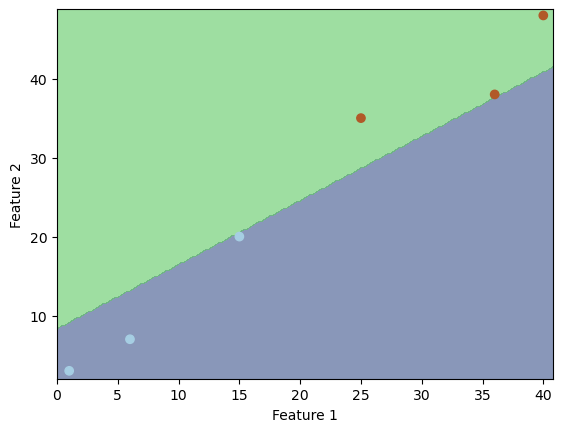

In [4]:
class Perceptron:
    def __init__(self,input_size):
        self.weights = np.zeros(input_size)
        self.bias =0

    def predict(self,inputs):
        return np.dot(inputs,self.weights) + self.bias > 0

    def train(self,training_inputs,labels,epochs=100,learning_rate=0.1):
        for epooch in range (epochs):
            for input,label in zip(training_inputs,labels):
                inputs = np.array(input)
                predict = self.predict(inputs)
                self.weights += learning_rate * (label - predict) * inputs
                self.bias += learning_rate * (label - predict)

X = np.array([[1,3],[6,7],[15,20],[25,35],[36,38],[40,48]])
y = np.array([0,0,0,1,1,1])

perceptron = Perceptron(len(X[0]))
perceptron.train(X,y)

x_min , x_max = X[:,0].min() - 1 , X[:,0].max() + 1
y_min , y_max = X[:,1].min() - 1 ,X[:,1].max() + 1

xx ,yy = np.meshgrid(np.arange(x_min,x_max, 0.2) , np.arange(y_min,y_max,0.2))

Z = perceptron.predict(np.c_[xx.ravel() , yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx,yy,Z,alpha =0.6)
plt.scatter(X[:,0],X[:,1],c=y , cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')

plt.show()